<div style ="border: blue solid 5px; font-family: Agency FB;	"><center>
<a href="#" ></a> 
    <h1> <font color="blue">Traitement des bases Esane</font> </h1> 
<a href="#" ></a>     
</center>
</div>

# Table de matières

* [Préliminaire](#préliminaire)
* [1. Chargement de base de données](#chargement-de-base-de-données)
* [2. Sélection de la base de travail](#2-sélection-de-la-base-de-travail)
* [3. Base globale ou Base TPE/PME](#3-base-globale-ou-base-tpepme)
* [4. Imputation des données 2020](#4-imputation-des-données-2020)
* [5. Fusion de Base Esane et Secten](#5-fusion-de-base-esane-et-secten)
* [6. STATISTIQUE DESCRIPTIVE](#6-statistique-descriptive-pour-le-rapport)

Les bases Esanes fournissent les informations financières par filière de 2009-2019

# Préliminaire

In [3]:
# Importation des librairies nécessaires
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Définition du repertoire de travail: dossier "Esane_donnees_brutes" dans bdd du projet
os.chdir("D:/ENSAI/2A/Projet Statistique/projet-risque-de-transition/bdd/Esane_donnees_brutes")  # Mettez ic le repertoire de vos bases

# 1. Chargement des bases Esane

Les données ésane sont des données financières agrégées selon le code APE. Nous avons téléchargé toutes ces données sur le site officiel de l'INSEE https://www.insee.fr/fr/statistiques/5427753?sommaire=5427759. Ces données portent sur les principales caractéristiques des entreprises agrégées au niveau filière et par catégorie.<p>

Pour chaque année, une base Esane est mise en ligne par l'INSEE. Nous avons pu récupérer les données ésane sur les principales caractériques des entreprises de 2009 à 2019 disponibles notre drive (lien drive https://drive.google.com/drive/u/1/folders/1gQfn5G5yh97FgqhxYY4QOMiJS3_2qLE4). <p>
Ce note-book va décrire les codes de chargement et création de la base globale Esane qui porte sur plusieurs années. Pour toutes les bases, la procédure sera la même: nous chargons d'abord la base de l'année t, ensuite nous nettoyons les noms des variables et enfin nous fusionnons la base avec les bases des années antérieures. On vérifie la qualité de la fusion en comparant le nombre d'observations et de variables avant et après la fusion

## Base 2009

In [5]:
# Importation de la base de 2009
esane_2009 = pd.read_excel("DD_esane09_caracteristiques_taille.xls", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables


In [6]:
# Affichage de nombre d'observations et de variables
esane_2009.shape

(1810, 16)

In [7]:
# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2009.isna().sum().sort_values()/esane_2009.shape[0]*100)

 Taux de valeurs manquantes en % 
 Secteur d'activité                                               0.000000
Activité                                                         0.000000
Tranche d'effectif                                               0.000000
Effectifs salariés en équivalent temps plein                    16.298343
Effectifs salariés au 31 décembre                               16.298343
Frais de personnel                                              16.795580
Chiffre d'affaires à l'exportation                              17.292818
Nombre d'entreprises                                            22.541436
Chiffre d'affaires Hors Taxes                                   25.027624
Valeur ajoutée - y compris autres produits et autres charges    26.906077
Excédent brut d'exploitation                                    26.906077
Capacité d'autofinancement                                      33.867403
Résultat courant avant impôts                                   34.088398
Rés

In [8]:
# Typologie des variables
esane_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1810 entries, 0 to 1809
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Secteur d'activité                                            1810 non-null   object 
 1   Activité                                                      1810 non-null   object 
 2   Tranche d'effectif                                            1810 non-null   object 
 3   Nombre d'entreprises                                          1402 non-null   float64
 4   Effectifs salariés en équivalent temps plein                  1515 non-null   float64
 5   Effectifs salariés au 31 décembre                             1515 non-null   float64
 6   Effectifs occupés                                             82 non-null     float64
 7   Chiffre d'affaires Hors Taxes                                 1357 no

In [9]:
# Repartition par catégorie d'entreprie
esane_2009["Tranche d'effectif"].value_counts()

Ensemble des tranches d'effectif     362
De 0 à 9 salariés en ETP             362
De 10 à 19 salariés en ETP           362
De 20 à 249 salariés en ETP          362
Plus de 250 salariés en ETP          362
Name: Tranche d'effectif, dtype: int64

##### On crée une variable année dans cette base

In [10]:
# Création de la variable annee
esane_2009 = esane_2009.assign(annee = 2009)

### Nettoyage des noms des variables

In [11]:
# Correction de noms des variables
dic_variables_rename = {"Secteur d'activité":"SecteurDActivite",
'NIVEAU': 'NiveauNAF',
'Activité':'Activite',
"Tranche d'effectif": "CategorieEntrp",
"Nombre d'entreprises":"NbEntrp",
"Effectifs salariés en équivalent temps plein":"Salaries_tps_plein",
"Effectifs salariés au 31 décembre":"Salaries_au_31dec",
"Effectifs occupés":"EffectifsOccupes",
"Chiffre d'affaires Hors Taxes":"CA_hors_taxe",
"Chiffre d'affaires à l'exportation":"CA_exportation",
"Valeur ajoutée - y compris autres produits et autres charges":"VA_et_autres_prdts_charges",
"Frais de personnel":"FraisPersonnel",
"Excédent brut d'exploitation":"EBE",
"Capacité d'autofinancement":"CapaciteAutofinancement",
"Résultat courant avant impôts":"ResultatCourantAvantImpots",
"Résultat net comptable":"ResultatNetComptable",
"Investissements corporels bruts hors apports":"InvestCorporelsBrutsHorsApports"}

esane_2009.rename(columns= dic_variables_rename, inplace = True)

 ## Base 2010

In [12]:
# Importation de la base de 2010
esane_2010 = pd.read_excel("DD_esane10_caracteristiques_taille.xls", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

In [13]:
# Affichage de nombre d'observations et de variables
esane_2010.shape

(1805, 17)

In [14]:
# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2010.isna().sum().sort_values()/esane_2010.shape[0]*100)

 Taux de valeurs manquantes en % 
 NIVEAU                                                           0.000000
Secteur d'activité                                               0.000000
Activité                                                         0.000000
Tranche d'effectif                                               0.000000
Investissements corporels bruts hors apports                    20.387812
Nombre d'unités légales                                         22.825485
Effectifs salariés en equivalent temps plein                    24.321330
Effectifs salariés au 31 décembre                               24.321330
Résultat net comptable                                          24.376731
Valeur ajoutée - y compris autres produits et autres charges    24.376731
Frais de personnel                                              24.376731
Excédent brut d'exploitation                                    24.376731
Résultat courant avant impôts                                   24.376731
Chi

In [15]:
# Typologie des variables
esane_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 17 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   NIVEAU                                                        1805 non-null   object 
 1   Secteur d'activité                                            1805 non-null   object 
 2   Activité                                                      1805 non-null   object 
 3   Tranche d'effectif                                            1805 non-null   object 
 4   Nombre d'unités légales                                       1393 non-null   float64
 5   Effectifs salariés en equivalent temps plein                  1366 non-null   float64
 6   Effectifs salariés au 31 décembre                             1366 non-null   float64
 7   Effectifs occupés                                             1349 no

In [16]:
# Repartition par catégorie d'entreprie
esane_2010["Tranche d'effectif"].value_counts()

Ensemble des tranches d'effectif     361
De 0 à 9 salariés en ETP             361
De 10 à 19 salariés en ETP           361
De 20 à 249 salariés en ETP          361
Plus de 250 salariés en ETP          361
Name: Tranche d'effectif, dtype: int64

In [17]:
# Création de la variable annee
#esane_2010["annee"] = 2010
esane_2010 = esane_2010.assign(annee = 2010)

#### Nettoyage des noms des variables

In [18]:
dic_variables_rename_1 = {"Secteur d'activité":"SecteurDActivite",
'NIVEAU': 'NiveauNAF',
'Activité':'Activite',
"Tranche d'effectif": "CategorieEntrp",
"Nombre d'unités légales":"NbEntrp",
"Effectifs salariés en equivalent temps plein":"Salaries_tps_plein",
"Effectifs salariés au 31 décembre":"Salaries_au_31dec",
"Effectifs occupés":"EffectifsOccupes",
"Chiffre d'affaires Hors Taxes":"CA_hors_taxe",
"Chiffre d'affaires à l'exportation":"CA_exportation",
"Valeur ajoutée - y compris autres produits et autres charges":"VA_et_autres_prdts_charges",
"Frais de personnel":"FraisPersonnel",
"Excédent brut d'exploitation":"EBE",
"Capacité d'autofinancement":"CapaciteAutofinancement",
"Résultat courant avant impôts":"ResultatCourantAvantImpots",
"Résultat net comptable":"ResultatNetComptable",
"Investissements corporels bruts hors apports":"InvestCorporelsBrutsHorsApports"}
# Correction de noms des variables
esane_2010.rename(columns= dic_variables_rename_1, inplace = True)

### Fusion des bases 2009 et 2010

In [19]:
# Fusion de bases 2009 et 2010
esane_until_2010 = pd.concat([esane_2009,esane_2010], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2010.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2010.shape[0] == (esane_2010.shape[0] + esane_2009.shape[0]),
" , ", esane_until_2010.shape[1] == esane_2010.shape[1], ",",esane_until_2010.shape[1] == esane_2009.shape[1] ,")")

Nombre d'observations et de variables  (3615, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True , False )


## Base 2011

In [20]:
# Importation de la base de 2011
esane_2011 = pd.read_excel("DD_esane11_caracteristiques_taille.xls", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

# Affichage de nombre d'observations et de variables
print("Nombre de variables et d'observations: ",esane_2011.shape, " \n")


# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2011.isna().sum().sort_values()/esane_2011.shape[0]*100)


# Typologie des variables
print(esane_2011.info())

# Repartition par catégorie d'entreprie
print(esane_2011["Tranche d'effectif"].value_counts())

# Création de la variable annee
esane_2011["annee"] = 2011

Nombre de variables et d'observations:  (1805, 17)  

 Taux de valeurs manquantes en % 
 NIVEAU                                                           0.000000
Secteur d'activité                                               0.000000
Activité                                                         0.000000
Tranche d'effectif                                               0.000000
Nombre d'unités légales                                         21.772853
Effectifs salariés en equivalent temps plein                    23.601108
Effectifs salariés au 31 décembre                               23.601108
Effectifs occupés                                               23.933518
Investissements corporels bruts hors apports                    25.429363
Valeur ajoutée - y compris autres produits et autres charges    25.484765
Frais de personnel                                              25.484765
Excédent brut d'exploitation                                    25.484765
Résultat courant avant 

#### Nettoyage des noms des variables
Nous utilisons le dictionnaire `dic_variables_rename_1` comme les bases de 2010 et 2011 ont les mêmes noms des variables.

In [21]:
# Correction de noms des variables
esane_2011.rename(columns= dic_variables_rename_1, inplace = True)

### Fusion des bases 2009, 2010 et 2011

Pour la qualité e la jointure, nous regardons si nous avons le même nombre de variables et d'observations avant et après la fusion.

In [22]:
# Fusion de bases 2009, 2010 et 2011
esane_until_2011 = pd.concat([esane_until_2010,esane_2011], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2011.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2011.shape[0] == (esane_until_2010.shape[0] + esane_2011.shape[0]),
" , ", esane_until_2011.shape[1] == esane_until_2010.shape[1], ")")

Nombre d'observations et de variables  (5420, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True )


## Base de 2012

In [23]:
# Importation de la base de 2012
esane_2012 = pd.read_excel("DD_esane12_caracteristiques_taille.xls", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

# Affichage de nombre d'observations et de variables
print("Nombre de variables et d'observations: ",esane_2012.shape, " \n")


# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2012.isna().sum().sort_values()/esane_2012.shape[0]*100)


# Typologie des variables
print(esane_2012.info())

# Repartition par catégorie d'entreprie
print(esane_2012["Tranche d'effectif"].value_counts())

# Création de la variable annee
esane_2012["annee"] = 2012

Nombre de variables et d'observations:  (1805, 17)  

 Taux de valeurs manquantes en % 
 NIVEAU                                                            0.000000
Secteur d'activité                                                0.000000
Activité                                                          0.000000
Tranche d'effectif                                                0.000000
Nombre d'unités légales                                          16.509695
Effectifs salariés en equivalent temps plein                     18.504155
Effectifs salariés au 31 décembre                                18.504155
Résultat courant avant impôts                                    18.614958
Excédent brut d'exploitation                                     18.614958
Frais de personnel                                               18.614958
Chiffre d'affaires Hors Taxes                                    18.614958
Valeur ajoutée - y compris autres produits et autres charges     18.614958
Chiffre d'a

#### Nettoyage des noms des variables

In [24]:
# Correction de noms des variables
esane_2012.rename(columns= dic_variables_rename_1, inplace = True)

### Fusion des bases 2009 à 2012

In [25]:
# Fusion de bases 2009 à 2012
esane_until_2012 = pd.concat([esane_until_2011,esane_2012], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2012.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2012.shape[0] == (esane_until_2011.shape[0] + esane_2012.shape[0]),
" , ", esane_until_2012.shape[1] == esane_until_2011.shape[1], ")")

Nombre d'observations et de variables  (7225, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True )


In [26]:
esane_2012.CategorieEntrp.value_counts()

Ensemble des tranches d'effectif     361
De 0 à 9 salariés en ETP             361
De 10 à 19 salariés en ETP           361
De 20 à 249 salariés en ETP          361
Plus de 250 salariés en ETP          361
Name: CategorieEntrp, dtype: int64

## Base de 2013

In [27]:
# Importation de la base de 2012
esane_2013 = pd.read_excel("DD_esane13ep_caracteristiques_taille.xls", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

# Affichage de nombre d'observations et de variables
print("Nombre de variables et d'observations: ",esane_2013.shape, " \n")


# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2013.isna().sum().sort_values()/esane_2013.shape[0]*100)


# Typologie des variables
print(esane_2013.info())

# Repartition par catégorie d'entreprie
print(esane_2013["Tranche d'effectif"].value_counts())

# Création de la variable annee
esane_2013["annee"] = 2013

Nombre de variables et d'observations:  (1805, 17)  

 Taux de valeurs manquantes en % 
 NIVEAU                                                            0.000000
Secteur d'activité                                                0.000000
Activité                                                          0.000000
Tranche d'effectif                                                0.000000
Nombre d'entreprises                                             16.011080
Résultat courant avant impôts                                    20.831025
Excédent brut d'exploitation                                     20.831025
Frais de personnel                                               20.831025
Valeur ajoutée - y compris autres produits et autres charges     20.831025
Chiffre d'affaires Hors Taxes                                    20.831025
Chiffre d'affaires à l'exportation                               20.831025
Effectifs salariés au 31 décembre                                21.052632
Effectifs s

### Nettoyage des noms des variables


In [28]:
dic_variables_rename_2 = {"Secteur d'activité":"SecteurDActivite",
'NIVEAU': 'NiveauNAF',
'Activité':'Activite',
"Tranche d'effectif": "CategorieEntrp",
"Nombre d'entreprises":"NbEntrp",
"Effectifs salariés en equivalent temps plein":"Salaries_tps_plein",
"Effectifs salariés au 31 décembre":"Salaries_au_31dec",
"Effectifs occupés":"EffectifsOccupes",
"Chiffre d'affaires Hors Taxes":"CA_hors_taxe",
"Chiffre d'affaires à l'exportation":"CA_exportation",
"Valeur ajoutée - y compris autres produits et autres charges":"VA_et_autres_prdts_charges",
"Frais de personnel":"FraisPersonnel",
"Excédent brut d'exploitation":"EBE",
"Capacité d'autofinancement":"CapaciteAutofinancement",
"Résultat courant avant impôts":"ResultatCourantAvantImpots",
"Résultat net comptable":"ResultatNetComptable",
"Investissements corporels bruts hors apports":"InvestCorporelsBrutsHorsApports"}

esane_2013.rename(columns = dic_variables_rename_2, inplace=True)

### Fusion des bases de 2009 à 2013

In [29]:
# Fusion de bases 2009 à 2013
esane_until_2013 = pd.concat([esane_until_2012,esane_2013], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2013.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2013.shape[0] == (esane_until_2012.shape[0] + esane_2013.shape[0]),
" , ", esane_until_2013.shape[1] == esane_until_2012.shape[1], ")")

Nombre d'observations et de variables  (9030, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True )


## Base de 2014

In [30]:
# Importation de la base de 2012
esane_2014 = pd.read_excel("DD_esane14ep_caracteristiques_taille.xls", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

# Affichage de nombre d'observations et de variables
print("Nombre de variables et d'observations: ",esane_2014.shape, " \n")


# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2014.isna().sum().sort_values()/esane_2014.shape[0]*100)


# Typologie des variables
print(esane_2014.info())

# Repartition par catégorie d'entreprie
print(esane_2014["Tranche d'effectif"].value_counts())

# Création de la variable annee
esane_2014["annee"] = 2014

Nombre de variables et d'observations:  (1805, 17)  

 Taux de valeurs manquantes en % 
 NIVEAU                                                            0.000000
Secteur d'activité                                                0.000000
Activité                                                          0.000000
Tranche d'effectif                                                0.000000
Nombre d'entreprises                                             15.180055
Effectifs salariés en equivalent temps plein                     17.783934
Effectifs salariés au 31 décembre                                17.783934
Résultat courant avant impôts                                    18.060942
Excédent brut d'exploitation                                     18.060942
Frais de personnel                                               18.060942
Chiffre d'affaires Hors Taxes                                    18.060942
Valeur ajoutée - y compris autres produits et autres charges     18.060942
Résultat ne

#### Nettoyage des noms des variables

In [31]:
# Correction de noms des variables
esane_2014.rename(columns= dic_variables_rename_2, inplace = True)

### Fusion des bases de 2009 à 2014

In [32]:
# Fusion de bases 2009 à 2014
esane_until_2014 = pd.concat([esane_until_2013,esane_2014], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2014.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2014.shape[0] == (esane_until_2013.shape[0] + esane_2014.shape[0]),
" , ", esane_until_2014.shape[1] == esane_until_2013.shape[1], ")")

Nombre d'observations et de variables  (10835, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True )


## Base de 2015

In [33]:
# Importation de la base de 2012
esane_2015 = pd.read_excel("DD_esane15ep_caracteristiques_taille.xls", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

# Affichage de nombre d'observations et de variables
print("Nombre de variables et d'observations: ",esane_2015.shape, " \n")


# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2015.isna().sum().sort_values()/esane_2015.shape[0]*100)


# Typologie des variables
print(esane_2015.info())

# Repartition par catégorie d'entreprie
print(esane_2015["Tranche d'effectif"].value_counts())

# Création de la variable annee
esane_2015["annee"] = 2015

Nombre de variables et d'observations:  (1444, 17)  

 Taux de valeurs manquantes en % 
 NIVEAU                                                            0.000000
Secteur d'activité                                                0.000000
Activité                                                          0.000000
Tranche d'effectif                                                0.000000
Nombre d'Entreprises                                             16.689751
Résultat courant avant impôts                                    19.529086
Excédent brut d'exploitation                                     19.529086
Frais de personnel                                               19.529086
Valeur ajoutée - y compris autres produits et autres charges     19.529086
Chiffre d'affaires Hors Taxes                                    19.529086
Chiffre d'affaires à l'exportation                               19.667590
Résultat net comptable                                           20.637119
Effectifs s

#### Nettoyage des noms des variables

In [34]:
dic_variables_rename_3 = {"Secteur d'activité":"SecteurDActivite",
'NIVEAU': 'NiveauNAF',
'Activité':'Activite',
"Tranche d'effectif": "CategorieEntrp",
"Nombre d'Entreprises":"NbEntrp",
"Effectifs salariés en equivalent temps plein":"Salaries_tps_plein",
"Effectifs salariés au 31 décembre":"Salaries_au_31dec",
"Effectifs occupés":"EffectifsOccupes",
"Chiffre d'affaires Hors Taxes":"CA_hors_taxe",
"Chiffre d'affaires à l'exportation":"CA_exportation",
"Valeur ajoutée - y compris autres produits et autres charges":"VA_et_autres_prdts_charges",
"Frais de personnel":"FraisPersonnel",
"Excédent brut d'exploitation":"EBE",
"Capacité d'autofinancement":"CapaciteAutofinancement",
"Résultat courant avant impôts":"ResultatCourantAvantImpots",
"Résultat net comptable":"ResultatNetComptable",
"Investissements corporels bruts hors apports":"InvestCorporelsBrutsHorsApports"}
# Correction de noms des variables
esane_2015.rename(columns= dic_variables_rename_3, inplace = True)

### Fusion des bases de 2009 à 2015

In [35]:
# Fusion de bases 2009 à 2015
esane_until_2015 = pd.concat([esane_until_2014,esane_2015], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2015.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2015.shape[0] == (esane_until_2014.shape[0] + esane_2015.shape[0]),
" , ", esane_until_2015.shape[1] == esane_until_2014.shape[1], ")")

Nombre d'observations et de variables  (12279, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True )


## Base de 2016

In [36]:
# Importation de la base de 2012
esane_2016 = pd.read_excel("DD_esane16ep_caracteristiques_taille.xls", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

# Affichage de nombre d'observations et de variables
print("Nombre de variables et d'observations: ",esane_2016.shape, " \n")


# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2016.isna().sum().sort_values()/esane_2016.shape[0]*100)


# Typologie des variables
print(esane_2016.info())

# Repartition par catégorie d'entreprie
print(esane_2016["Tranche d'effectif"].value_counts())

# Création de la variable annee
esane_2016["annee"] = 2016

Nombre de variables et d'observations:  (1444, 17)  

 Taux de valeurs manquantes en % 
 NIVEAU                                                            0.000000
Secteur d'activité                                                0.000000
Activité                                                          0.000000
Tranche d'effectif                                                0.000000
Nombre d'Entreprises                                             18.628809
Résultat courant avant impôts                                    22.299169
Excédent brut d'exploitation                                     22.299169
Frais de personnel                                               22.299169
Valeur ajoutée - y compris autres produits et autres charges     22.299169
Chiffre d'affaires Hors Taxes                                    22.299169
Chiffre d'affaires à l'exportation                               22.506925
Résultat net comptable                                           22.991690
Effectifs s

#### Nettoyage des noms des variables

In [37]:
# Correction de noms des variables
esane_2016.rename(columns= dic_variables_rename_3, inplace = True)

### Fusion des bases de 2009 à 2016

In [38]:
# Fusion de bases 2009 à 2016
esane_until_2016 = pd.concat([esane_until_2015,esane_2016], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2016.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2016.shape[0] == (esane_until_2015.shape[0] + esane_2016.shape[0]),
" , ", esane_until_2016.shape[1] == esane_until_2015.shape[1], ")")

Nombre d'observations et de variables  (13723, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True )


## Base de 2017

In [39]:
# Importation de la base de 2017
esane_2017 = pd.read_excel("DD_esane17ep_caracteristiques_taille.xls", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

# Affichage de nombre d'observations et de variables
print("Nombre de variables et d'observations: ",esane_2017.shape, " \n")


# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2017.isna().sum().sort_values()/esane_2017.shape[0]*100)


# Typologie des variables
print(esane_2017.info())

# Repartition par catégorie d'entreprie
print(esane_2017["Catégorie de l'entreprise"].value_counts())

# Création de la variable annee
esane_2017["annee"] = 2017

Nombre de variables et d'observations:  (1444, 17)  

 Taux de valeurs manquantes en % 
 NIVEAU NAF                                                        0.000000
Secteur d'activité                                                0.000000
Activité                                                          0.000000
Catégorie de l'entreprise                                         0.000000
Nombre d'entreprises                                             18.351801
Effectifs salariés en equivalent temps plein                     22.437673
Effectifs salariés au 31 décembre                                22.437673
Résultat courant avant impôts                                    23.753463
Excédent brut d'exploitation                                     23.753463
Frais de personnel                                               23.753463
Chiffre d'affaires Hors Taxes                                    23.753463
Valeur ajoutée - y compris autres produits et autres charges     23.753463
Chiffre d'a

#### Nettoyage des noms des variables

In [40]:
dic_variables_rename_4 = {"Secteur d'activité":"SecteurDActivite",
'NIVEAU NAF': 'NiveauNAF',
'Activité':'Activite',
"Catégorie de l'entreprise": "CategorieEntrp",
"Nombre d'entreprises":"NbEntrp",
"Effectifs salariés en equivalent temps plein":"Salaries_tps_plein",
"Effectifs salariés au 31 décembre":"Salaries_au_31dec",
"Effectifs occupés":"EffectifsOccupes",
"Chiffre d'affaires Hors Taxes":"CA_hors_taxe",
"Chiffre d'affaires à l'exportation":"CA_exportation",
"Valeur ajoutée - y compris autres produits et autres charges":"VA_et_autres_prdts_charges",
"Frais de personnel":"FraisPersonnel",
"Excédent brut d'exploitation":"EBE",
"Capacité d'autofinancement":"CapaciteAutofinancement",
"Résultat courant avant impôts":"ResultatCourantAvantImpots",
"Résultat net comptable":"ResultatNetComptable",
"Investissements corporels bruts hors apports":"InvestCorporelsBrutsHorsApports"}
# Correction de noms des variables
esane_2017.rename(columns= dic_variables_rename_4, inplace = True)

### Fusion des bases de 2009 à 2017

In [41]:
# Fusion de bases 2009 à 2017
esane_until_2017 = pd.concat([esane_until_2016,esane_2017], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2017.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2017.shape[0] == (esane_until_2016.shape[0] + esane_2017.shape[0]),
" , ", esane_until_2017.shape[1] == esane_until_2016.shape[1], ")")

Nombre d'observations et de variables  (15167, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True )


In [42]:
### Catégorie d'entreprise
esane_until_2017.CategorieEntrp.value_counts()

Ensemble des tranches d'effectif                                          2889
De 0 à 9 salariés en ETP                                                  2889
Plus de 250 salariés en ETP                                               2889
De 10 à 19 salariés en ETP                                                2167
De 20 à 249 salariés en ETP                                               2167
De 10 à 249 salariés en ETP                                                722
Ensemble des catégories d'entreprise                                       361
Microentreprises (MICRO)                                                   361
Petites et moyennes entreprises (PME), hors Microentreprises               361
Entreprises de taille intermédiaire (ETI) ou Grandes entreprises (GE)      361
Name: CategorieEntrp, dtype: int64

## Base de 2018

In [43]:
# Importation de la base de 2018
esane_2018 = pd.read_excel("DD_esane18ep_caracteristiques_taille.xlsx", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

# Affichage de nombre d'observations et de variables
print("Nombre de variables et d'observations: ",esane_2018.shape, " \n")


# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2018.isna().sum().sort_values()/esane_2018.shape[0]*100)


# Typologie des variables
print(esane_2018.info())

# Repartition par catégorie d'entreprie
print(esane_2018["Catégorie de l'entreprise"].value_counts())

# Création de la variable annee
esane_2018["annee"] = 2018

Nombre de variables et d'observations:  (1444, 17)  

 Taux de valeurs manquantes en % 
 NIVEAU NAF                                                        0.000000
Secteur d'activité                                                0.000000
Activité                                                          0.000000
Catégorie de l'entreprise                                         0.000000
Nombre d'entreprises                                             19.390582
Résultat courant avant impôts                                    22.229917
Excédent brut d'exploitation                                     22.229917
Valeur ajoutée - y compris autres produits et autres charges     22.229917
Chiffre d'affaires Hors Taxes                                    22.229917
Frais de personnel                                               22.368421
Chiffre d'affaires à l'exportation                               22.437673
Résultat net comptable                                           22.576177
Effectifs s

#### Nettoyage des noms des variables

In [44]:
# Correction de noms des variables
esane_2018.rename(columns= dic_variables_rename_4, inplace = True)

### Fusion des bases de 2009 à 2018

In [45]:
# Fusion de bases 2009 à 2018
esane_until_2018 = pd.concat([esane_until_2017,esane_2018], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2018.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2018.shape[0] == (esane_until_2017.shape[0] + esane_2018.shape[0]),
" , ", esane_until_2018.shape[1] == esane_until_2017.shape[1], ")")

Nombre d'observations et de variables  (16611, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True )


## Base de 2019

In [46]:
# Importation de la base de 2019
esane_2019 = pd.read_excel("DD_esane19ep_caracteristiques_taille.xlsx", header = 11,na_values = ["N", "S"])

# Les valeurs "N" et "S" sont respectivement des valeurs manquantes et valeurs soumises au secret statistique
# Nous transformons en missing values dans notre dataframe

# header = 11: pour recuperer les données à partir de la ligne 12 correspondant aux noms des variables

# Affichage de nombre d'observations et de variables
print("Nombre de variables et d'observations: ",esane_2019.shape, " \n")


# Affichage du taux de valeurs manquantes (vraies manquantes et celles soumises au secret statistique)
print(" Taux de valeurs manquantes en % \n =======================================\n",
esane_2019.isna().sum().sort_values()/esane_2019.shape[0]*100)


# Typologie des variables
print(esane_2019.info())

# Repartition par catégorie d'entreprie
print(esane_2019["Catégorie de l'entreprise"].value_counts())

# Création de la variable annee
esane_2019["annee"] = 2019


Nombre de variables et d'observations:  (1444, 17)  

 Taux de valeurs manquantes en % 
 NIVEAU NAF                                                        0.000000
Secteur d'activité                                                0.000000
Activité                                                          0.000000
Catégorie de l'entreprise                                         0.000000
Nombre d'entreprises                                             18.767313
Résultat courant avant impôts                                    20.983380
Excédent brut d'exploitation                                     20.983380
Frais de personnel                                               20.983380
Valeur ajoutée - y compris autres produits et autres charges     20.983380
Chiffre d'affaires Hors Taxes                                    20.983380
Chiffre d'affaires à l'exportation                               21.052632
Résultat net comptable                                           22.022161
Effectifs s

#### Nettoyage des noms des variables

In [47]:
# Correction de noms des variables
esane_2019.rename(columns= dic_variables_rename_4, inplace = True)

### Fusion des bases de 2009 à 2019

In [48]:
# Fusion de bases 2009 à 2019
esane_until_2019 = pd.concat([esane_until_2018,esane_2019], ignore_index=True)

print("Nombre d'observations et de variables ", esane_until_2019.shape, " \n")

# Qualité de la fusion
print("Qualité de la jointure est (obs, vars) :  (", esane_until_2019.shape[0] == (esane_until_2018.shape[0] + esane_2019.shape[0]),
" , ", esane_until_2019.shape[1] == esane_until_2018.shape[1], ")")

Nombre d'observations et de variables  (18055, 18)  

Qualité de la jointure est (obs, vars) :  ( True  ,  True )


In [49]:
## Structure de la base finale
esane_until_2019.head(5)

,SecteurDActivite,Activite,CategorieEntrp,NbEntrp,Salaries_tps_plein,Salaries_au_31dec,EffectifsOccupes,CA_hors_taxe,CA_exportation,VA_et_autres_prdts_charges,FraisPersonnel,EBE,CapaciteAutofinancement,ResultatCourantAvantImpots,ResultatNetComptable,InvestCorporelsBrutsHorsApports,annee,NiveauNAF
0,AZ,"Agriculture, sylviculture et pêche",Ensemble des tranches d'effectif,5377.0,5490.0,5895.0,NaN,1384.4,167.7,393.9,251.6,129.6,127.6,35.3,53.5,107.9,2009,NaN
1,AZ,"Agriculture, sylviculture et pêche",De 0 à 9 salariés en ETP,5304.0,3680.0,3886.0,NaN,912.1,93.4,300.6,168.7,117.7,119.2,41.6,59.0,NaN,2009,NaN
2,AZ,"Agriculture, sylviculture et pêche",De 10 à 19 salariés en ETP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,NaN
3,AZ,"Agriculture, sylviculture et pêche",De 20 à 249 salariés en ETP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,NaN
4,AZ,"Agriculture, sylviculture et pêche",Plus de 250 salariés en ETP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,NaN


In [50]:
# copie de la base
esane = esane_until_2019.copy()

# 2.  Sélection de la base de travail

A l'aide de la variable `SecteurDActivite`, nous remarquons que les données sont désagrégées par code APE. On a des valeurs des agrégats financiers du niveau le plus élevé du code APE jusqu'au niveau le plus fin. Nous allons nous restreindre au niveau 1 du code APE (i.e au niveau branches d'activités)

In [51]:
esane.SecteurDActivite.value_counts()

960     55
96      55
952     55
951     55
95      55
        ..
274     50
052     45
64      45
642     45
942     45
Name: SecteurDActivite, Length: 361, dtype: int64

Nous créons une variable `NiveauAPE` qui prend `True` si on est au niveau 1 du code APE et `False` sinon.

In [52]:
# Création de l avariable permettant de sélectionner le code au niveau 1
esane["NiveauAPE"] = False
for i in range(0,esane.shape[0]):
    obsvt = esane["SecteurDActivite"][i].strip()
    if len(obsvt) == 1:
        esane["NiveauAPE"][i] = True

C:\Users\amado\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Nous avons `900` lignes d'observations qui concernent le niveau branches d'activités, reparties par catégorie d'entreprises. 

In [53]:
# Liste des activités 
esane.loc[esane["NiveauAPE"]== True,]["Activite"].count()

900

In [54]:
esane.loc[esane["NiveauAPE"]== True,].shape

(900, 19)

Les catégories d'entreprises ont des codifications différentes selon les années.

In [55]:
esane.CategorieEntrp.value_counts()

Ensemble des tranches d'effectif                                          2889
De 0 à 9 salariés en ETP                                                  2889
Plus de 250 salariés en ETP                                               2889
De 10 à 19 salariés en ETP                                                2167
De 20 à 249 salariés en ETP                                               2167
De 10 à 249 salariés en ETP                                                722
Ensemble des catégories d'entreprise                                       722
Microentreprises (MICRO)                                                   722
Petites et moyennes entreprises (PME), hors Microentreprises               722
Entreprises de taille intermédiaire (ETI) ou Grandes entreprises (GE)      722
Ensemble des catégories d'entreprise                                       361
Microentreprises (MICRO)                                                   361
Petites et moyennes entreprises (PME), hors Microent

##### Nous gardons uniquement le niveau 1 du code APE pour la suite de l'étude. 

In [56]:
# creation de la base finale
#esane_final = esane.loc[esane["NiveauAPE"]== True,]
esane_final = esane[esane['NiveauAPE'] == True]
print(esane_final.shape)
print(esane.shape)

(900, 19)
(18055, 19)


In [57]:
esane_final.annee.value_counts()

2009    90
2010    90
2011    90
2012    90
2013    90
2014    90
2015    72
2016    72
2017    72
2018    72
2019    72
Name: annee, dtype: int64

Valeurs manquantes

In [58]:
type(esane_final.isna().sum().sort_values(ascending=False))
esane_final.isna().sum().sort_values(ascending=False)/esane_final.shape[0]

EffectifsOccupes                   0.822222
CapaciteAutofinancement            0.164444
InvestCorporelsBrutsHorsApports    0.163333
ResultatNetComptable               0.111111
NiveauNAF                          0.100000
ResultatCourantAvantImpots         0.092222
VA_et_autres_prdts_charges         0.087778
EBE                                0.087778
NbEntrp                            0.080000
CA_hors_taxe                       0.078889
CA_exportation                     0.054444
Salaries_tps_plein                 0.051111
Salaries_au_31dec                  0.051111
FraisPersonnel                     0.050000
annee                              0.000000
SecteurDActivite                   0.000000
Activite                           0.000000
CategorieEntrp                     0.000000
NiveauAPE                          0.000000
dtype: float64

### Liste de variables utiles pour la suite de l'analyse

Nous n'avons pas sélectionné uniquement trois variables: `EffectifsOccupes`, `NiveauNAF` et `Salaries_au_31dec`. Les variables sur les effectifs, parce que nous disposons déjà la variable `Salaries_tps_plein`. 

In [59]:
## Sélection des variables pertinentes pour l'étude
liste_variables = ["annee", "CategorieEntrp","NbEntrp", "Activite", "SecteurDActivite",
"FraisPersonnel", "Salaries_tps_plein", "CA_exportation",
"CA_hors_taxe", "EBE", "VA_et_autres_prdts_charges", "ResultatNetComptable",
"CapaciteAutofinancement","ResultatCourantAvantImpots","InvestCorporelsBrutsHorsApports", "NiveauAPE"]

# Affectation de la liste
esane_final = esane_final[liste_variables]

#### Nombre d'observations indépendemment de la catégorie d'entreprises. C'est-à-dire qu'on considère toutes les entreprises dans chaque branche d'activités et à chaque année.

In [60]:
# Nombre de secteurs d'activité x Nombre d'année
(np.sum(esane_final["CategorieEntrp"] ==
"Ensemble des tranches d'effectif ") + np.sum(esane_final["CategorieEntrp"] ==
"Ensemble des catégories d'entreprise") + np.sum(esane_final["CategorieEntrp"] ==
"Ensemble des catégories d'entreprise "))

198

# 3. Base globale ou Base TPE/PME

Nous allons considérer toutes les entreprises de la base indépendemment de la catégorie. Pour cela, nous allons sélectionner les modalités `Ensemble des tranches d'effectif` et `Ensemble des catégories d'entreprise` de la variable sur la catégorie d'entreprises. On va donc se retrouver avec les valeurs des agrégats toutes les entreprises des différentes branches d'activités.

In [61]:
# Création de l avariable permettant de sélectionner le code au niveau 1
esane_final["categorie_1"] = (esane_final["CategorieEntrp"] == "Ensemble des tranches d'effectif ")
esane_final["categorie_2"] = (esane_final["CategorieEntrp"] == "Ensemble des catégories d'entreprise")
esane_final["categorie_3"] = (esane_final["CategorieEntrp"] == "Ensemble des catégories d'entreprise ")
esane_final["NiveauAPE"] = esane_final["categorie_1"] + esane_final["categorie_2"] + esane_final['categorie_3']
# Ensemble des tranches d'effectif 
# Ensemble des catégories d'entreprise

#esane_final.drop(["categorie_1", "categorie_2"], inplace=True)

In [62]:
print("==============\nNb AVANT: ", esane_final.shape)

Nb AVANT:  (900, 19)


Avant de sélectionner les modalités indiquées plus haut pour avoir les données entreprises, nous allons d'abord fair une hypothèse sur certaines modalités pour obtenir les données filières les TPE/PME uniquement.

## Sélection des données des TPE/PME

In [63]:
# Nombre de secteurs d'activité x Nombre d'année
esane_ge = esane_final.copy()
(np.sum(esane_ge["CategorieEntrp"] ==
"Plus de 250 salariés en ETP ") + np.sum(esane_ge["CategorieEntrp"] ==
"Entreprises de taille intermédiaire (ETI) ou Grandes entreprises (GE)") + np.sum(esane_ge["CategorieEntrp"] ==
"Entreprises de taille intermédiaire (ETI) ou Grandes entreprises (GE) "))

esane_ge["NiveauAPE"] = (esane_ge["CategorieEntrp"] !=
"Plus de 250 salariés en ETP ") & (esane_ge["CategorieEntrp"] !=
"Entreprises de taille intermédiaire (ETI) ou Grandes entreprises (GE)") & (esane_ge["CategorieEntrp"] !=
"Entreprises de taille intermédiaire (ETI) ou Grandes entreprises (GE) ") & (esane_ge["CategorieEntrp"] !=
"Ensemble des tranches d'effectif ") & (esane_ge["CategorieEntrp"] !=
"Ensemble des catégories d'entreprise") & (esane_ge["CategorieEntrp"] != "Ensemble des catégories d'entreprise ")

In [64]:
pd.crosstab(esane_ge.CategorieEntrp,esane_ge.NiveauAPE)

NiveauAPE,False,True
CategorieEntrp,,
De 0 à 9 salariés en ETP,0,144
De 10 à 19 salariés en ETP,0,108
De 10 à 249 salariés en ETP,0,36
De 20 à 249 salariés en ETP,0,108
Ensemble des catégories d'entreprise,36,0
Ensemble des catégories d'entreprise,18,0
Ensemble des tranches d'effectif,144,0
Entreprises de taille intermédiaire (ETI) ou Grandes entreprises (GE),36,0
Entreprises de taille intermédiaire (ETI) ou Grandes entreprises (GE),18,0


L'hypothèse que nous allons considérer est que toutes modalités de la variable `CategorieEntrp` ayant des valeurs non nulles dans le tableau ci-dessus seront considérées commes des TPE/PME. Sur la base de cette hypothèse, nous sélectionnons ces modalités pour obtenir nos données filières pour les TPE/PME.

### Création de la base Esane pour les TPE/PME

In [65]:
esane_ge = esane_ge[esane_ge['NiveauAPE'] == True]
print("==============\nNb après: ", esane_ge.shape)

Nb après:  (504, 19)


In [66]:
pd.crosstab(esane_ge.CategorieEntrp,esane_ge.NiveauAPE)

NiveauAPE,True
CategorieEntrp,
De 0 à 9 salariés en ETP,144
De 10 à 19 salariés en ETP,108
De 10 à 249 salariés en ETP,36
De 20 à 249 salariés en ETP,108
Microentreprises (MICRO),36
Microentreprises (MICRO),18
"Petites et moyennes entreprises (PME), hors Microentreprises",36
"Petites et moyennes entreprises (PME), hors Microentreprises",18


In [67]:
## Suppression de quelques variables
esane_ge.drop(["NiveauAPE", "CategorieEntrp","categorie_1", "categorie_2", "categorie_3"], axis = 1, inplace=True)


In [68]:
# Valeurs manquantes
esane_ge.isna().sum()/esane_ge.shape[0]*100

annee                               0.000000
NbEntrp                             9.325397
Activite                            0.000000
SecteurDActivite                    0.000000
FraisPersonnel                      5.158730
Salaries_tps_plein                  5.357143
CA_exportation                      5.753968
CA_hors_taxe                        9.126984
EBE                                10.515873
VA_et_autres_prdts_charges         10.515873
ResultatNetComptable               13.095238
CapaciteAutofinancement            20.238095
ResultatCourantAvantImpots         11.111111
InvestCorporelsBrutsHorsApports    19.841270
dtype: float64

## Recupération des données d'ensemble

Il s'agit en effet de construire la base filière pour toutes les entreprises indépendemment de la catégorie. <p>
Pour la suite, la base `esane_tpe_pme` concerne les données filière des TPE/PME et `esane_final` toutes les entreprises de la branche d'activités.

In [69]:
# Nombre de secteurs d'activité x Nombre d'année
#print("Nb avant: \n", esane_final.NiveauAPE.value_counts())
#esane_final = esane_final.loc[esane_final["NiveauAPE"]== True,]
esa = esane_final.copy()
esane_final = esa[esa['NiveauAPE'] == True]
print("==============\nNb après: ", esane_final.shape)

Nb après:  (198, 19)


In [70]:
# Suppression de variables
esane_final.drop(["NiveauAPE", "CategorieEntrp","categorie_1", "categorie_2", "categorie_3"], axis = 1, inplace=True)

C:\Users\amado\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
esane_final.isna().sum().sort_values()/esane_final.shape[0]*100

annee                              0.000000
NbEntrp                            0.000000
Activite                           0.000000
SecteurDActivite                   0.000000
FraisPersonnel                     0.000000
Salaries_tps_plein                 0.000000
CA_exportation                     0.000000
CA_hors_taxe                       0.000000
EBE                                0.000000
VA_et_autres_prdts_charges         0.000000
ResultatCourantAvantImpots         0.000000
CapaciteAutofinancement            1.010101
InvestCorporelsBrutsHorsApports    1.010101
ResultatNetComptable               1.515152
dtype: float64

# 4. Imputation des données 2020

Nous ne disposons pas de base Esane pour l'année 2020 au moment de l'étude. Vu que cette année est importante dans cette étude, nous allons donc estimer les données concernant cette année. <p>
La méthode d'imputation proposée est de regarder d'abord la tendance entre 2009 et 2019 de chacune des variables et ensuite de trouver une méthode d'imputation efficace.

In [72]:
esane_final.columns

Index(['annee', 'NbEntrp', 'Activite', 'SecteurDActivite', 'FraisPersonnel',
       'Salaries_tps_plein', 'CA_exportation', 'CA_hors_taxe', 'EBE',
       'VA_et_autres_prdts_charges', 'ResultatNetComptable',
       'CapaciteAutofinancement', 'ResultatCourantAvantImpots',
       'InvestCorporelsBrutsHorsApports'],
      dtype='object')

## Tendance des variables pour les données des entreprises

Nous avons sélectionné le branche d'activités A qui correspond à l'`agriculture` et regardons l'évolution des différentes variables pour cette branche.

<function matplotlib.pyplot.show(close=None, block=None)>

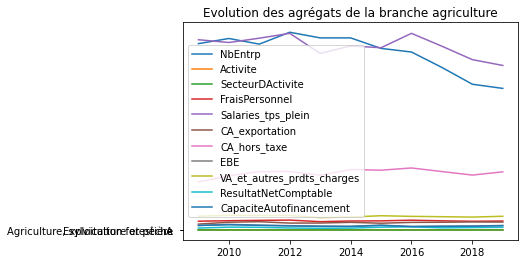

In [73]:
# Année 2020
liste_noms = ['NbEntrp', 'Activite', 'SecteurDActivite', 'FraisPersonnel',
       'Salaries_tps_plein', 'CA_exportation', 'CA_hors_taxe', 'EBE',
       'VA_et_autres_prdts_charges', 'ResultatNetComptable',
       'CapaciteAutofinancement']
var_nom =[]
for nom in liste_noms:
    plt.plot(esane_final["annee"][esane_final['SecteurDActivite']=='A '],
    esane_final[nom][esane_final['SecteurDActivite']=='A '])
    var_nom.append(nom)
plt.legend(var_nom)
plt.title('Evolution des agrégats de la branche agriculture')
plt.show

## Tendance des variables pour les données des TPE/PME

In [74]:
## Liste des différentes branches d'activités
esane_final[["Activite", "SecteurDActivite"]].value_counts()

Activite                                                                                SecteurDActivite
Enseignement                                                                            P                   11
Activités de services administratifs et de soutien                                      N                   11
Santé humaine et action sociale                                                         Q                   11
Production et distribution d'électricité, de gaz, de vapeur et d'air conditionné        D                   11
Production et distribution d'eau - assainissement, gestion des déchets et dépollution   E                   11
Information et communication                                                            J                   11
Industries extractives                                                                  B                   11
Industrie manufacturière                                                                C                   11
Héberge

## Imputation: Données esane en 2020

Les données ésane ne sont pas disponibles en 2020, donc nous allons essayer de prédire la valeur en 2020 pour 
chaque branche d'activités avec des données de 2009 à 2020.

## Toutes les entreprises

On crée une base pour 2020 en gardons les variables qui ne changent pas au cours du temps. On met de `NA`pour les autres variables. Et on la base 2020 à la base `esane_final`

In [75]:
condition = esane_final.annee  == 2019
esane_2020 = esane_final[condition]
esane_2020.annee = 2020
esane_2020 = esane_2020[["annee","NbEntrp","Activite","SecteurDActivite"]]

list_var_a_imputee = ['FraisPersonnel',
       'Salaries_tps_plein', 'CA_exportation', 'CA_hors_taxe', 'EBE',
       'VA_et_autres_prdts_charges', 'ResultatNetComptable',
       'CapaciteAutofinancement', 'ResultatCourantAvantImpots','InvestCorporelsBrutsHorsApports']

for var in list_var_a_imputee:
       esane_2020.loc[:,var] = np.nan

#esane_2020.head()

C:\Users\amado\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [76]:
condition = (esane_final.annee  == 2019)
esane_2021 = esane_final[condition]
esane_2021.annee = 2021
esane_2021 = esane_2021[["annee","NbEntrp","Activite","SecteurDActivite"]]

list_var_a_imputee = ['FraisPersonnel',
       'Salaries_tps_plein', 'CA_exportation', 'CA_hors_taxe', 'EBE',
       'VA_et_autres_prdts_charges', 'ResultatNetComptable',
       'CapaciteAutofinancement', 'ResultatCourantAvantImpots','InvestCorporelsBrutsHorsApports']

for var in list_var_a_imputee:
       esane_2021.loc[:,var] = np.nan

Fusion des bases 

In [77]:
esane_until_2020 = pd.concat([esane_final, esane_2020], ignore_index=True)
#esane_until_2021 = pd.concat([esane_until_2020, esane_2021], ignore_index=True)
esane_final = esane_until_2020.copy()

In [78]:
esane_final.isna().sum()

annee                               0
NbEntrp                             0
Activite                            0
SecteurDActivite                    0
FraisPersonnel                     18
Salaries_tps_plein                 18
CA_exportation                     18
CA_hors_taxe                       18
EBE                                18
VA_et_autres_prdts_charges         18
ResultatNetComptable               21
CapaciteAutofinancement            20
ResultatCourantAvantImpots         18
InvestCorporelsBrutsHorsApports    20
dtype: int64

On corrige les valeurs manquantes par une imputation de la moyenne. En effet, l'évolution des variables ne nous montre pas une grande tendance temporelle.

In [79]:
from sklearn.impute import SimpleImputer #, KNNImputer

In [80]:
imputer = SimpleImputer()
donnees = imputer.fit_transform(esane_final[list_var_a_imputee])
esane_final.drop(list_var_a_imputee, axis=1, inplace=True)
esane_final[list_var_a_imputee] = donnees

In [81]:
esane_final.isna().sum()

annee                              0
NbEntrp                            0
Activite                           0
SecteurDActivite                   0
FraisPersonnel                     0
Salaries_tps_plein                 0
CA_exportation                     0
CA_hors_taxe                       0
EBE                                0
VA_et_autres_prdts_charges         0
ResultatNetComptable               0
CapaciteAutofinancement            0
ResultatCourantAvantImpots         0
InvestCorporelsBrutsHorsApports    0
dtype: int64

In [82]:
esane_final.shape

(216, 14)

## Imputation des TPE/PME

La même procédure est utilisée qu'avec la base globale.

In [83]:
esane_ge.isna().sum()/esane_ge.shape[0]

annee                              0.000000
NbEntrp                            0.093254
Activite                           0.000000
SecteurDActivite                   0.000000
FraisPersonnel                     0.051587
Salaries_tps_plein                 0.053571
CA_exportation                     0.057540
CA_hors_taxe                       0.091270
EBE                                0.105159
VA_et_autres_prdts_charges         0.105159
ResultatNetComptable               0.130952
CapaciteAutofinancement            0.202381
ResultatCourantAvantImpots         0.111111
InvestCorporelsBrutsHorsApports    0.198413
dtype: float64

In [84]:
condition = esane_ge.annee  == 2019
esane_2020_ge = esane_ge[condition]
esane_2020_ge.annee = 2020
esane_2020_ge = esane_2020_ge[["annee","NbEntrp","Activite","SecteurDActivite"]]

list_var_a_imputee = ['FraisPersonnel',
       'Salaries_tps_plein', 'CA_exportation', 'CA_hors_taxe', 'EBE',
       'VA_et_autres_prdts_charges', 'ResultatNetComptable',
       'CapaciteAutofinancement', 'ResultatCourantAvantImpots','InvestCorporelsBrutsHorsApports']

for var in list_var_a_imputee:
       esane_2020_ge.loc[:,var] = np.nan

list_var_a_imputee.append("NbEntrp")

C:\Users\amado\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [85]:
esane_ge.annee.value_counts()

2009    54
2010    54
2011    54
2012    54
2013    54
2014    54
2015    36
2016    36
2017    36
2018    36
2019    36
Name: annee, dtype: int64

In [86]:
# Partie 2
esane_until_2020_tpe_pme = pd.concat([esane_ge, esane_2020_ge], ignore_index=True)
esane_ge= esane_until_2020_tpe_pme.copy()

In [87]:
esane_ge.isna().sum()/esane_ge.shape[0]

annee                              0.000000
NbEntrp                            0.088889
Activite                           0.000000
SecteurDActivite                   0.000000
FraisPersonnel                     0.114815
Salaries_tps_plein                 0.116667
CA_exportation                     0.120370
CA_hors_taxe                       0.151852
EBE                                0.164815
VA_et_autres_prdts_charges         0.164815
ResultatNetComptable               0.188889
CapaciteAutofinancement            0.255556
ResultatCourantAvantImpots         0.170370
InvestCorporelsBrutsHorsApports    0.251852
dtype: float64

A l'imputation, nous allons faire la somme des valeurs au croisement annee et Secteur d'activités, car à ce croisement on a plusieurs modalités qui sont considérées comme TPE/PME.

In [88]:
esane_tpe_pme =esane_ge.groupby(['annee', 'SecteurDActivite']).sum()
esane_tpe_pme['annee'] = esane_tpe_pme.index.get_level_values(0)
esane_tpe_pme['SecteurDActivite'] = esane_tpe_pme.index.get_level_values(1)
esane_tpe_pme.reset_index(inplace = True, drop = True)

### Imputation de la moyenne par secteur d'activités

In [89]:
for col in list_var_a_imputee:
    esane_tpe_pme.loc[(esane_tpe_pme[col] == 0), col] = np.nan
    esane_tpe_pme[col] = esane_tpe_pme.groupby(['SecteurDActivite'])[col]\
    .transform(lambda x: x.fillna(x.mean()))


In [90]:
## Imputatation
#imputer = SimpleImputer()
#donnees = imputer.fit_transform(esane_ge[list_var_a_imputee])
#esane_ge.drop(list_var_a_imputee, axis=1, inplace=True)
#esane_ge[list_var_a_imputee] = donnees

In [91]:
esane_tpe_pme.isna().sum()/esane_tpe_pme.shape[0]

NbEntrp                            0.0
FraisPersonnel                     0.0
Salaries_tps_plein                 0.0
CA_exportation                     0.0
CA_hors_taxe                       0.0
EBE                                0.0
VA_et_autres_prdts_charges         0.0
ResultatNetComptable               0.0
CapaciteAutofinancement            0.0
ResultatCourantAvantImpots         0.0
InvestCorporelsBrutsHorsApports    0.0
annee                              0.0
SecteurDActivite                   0.0
dtype: float64

In [92]:
## Description de la base TPE/PME
esane_tpe_pme.describe()

,NbEntrp,FraisPersonnel,Salaries_tps_plein,CA_exportation,CA_hors_taxe,EBE,VA_et_autres_prdts_charges,ResultatNetComptable,CapaciteAutofinancement,ResultatCourantAvantImpots,InvestCorporelsBrutsHorsApports,annee
count,216.000000,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,216418.657407,22425.688086,4.056835e+05,10884.823955,107801.848495,8763.695222,32768.618833,8892.920677,11513.394444,9221.930227,5228.913523,2014.500000
std,193923.572959,23734.092345,4.601852e+05,23034.485661,184449.888841,8812.082369,32772.639857,14142.717902,15412.405381,13835.520327,5936.753544,3.460071
min,1025.000000,81.400000,8.380000e+02,67.000000,586.700000,28.900000,113.000000,-1215.600000,-736.900000,-744.700000,74.700000,2009.000000
25%,75820.000000,4129.490909,7.309975e+04,466.588636,15171.175000,1814.075000,5859.350000,829.220000,1625.067500,786.225000,1238.075000,2011.750000
50%,166084.500000,16189.905000,2.302760e+05,1367.930000,58382.048182,4411.100000,25538.600000,2718.021500,4962.125000,3059.900000,3287.890000,2014.500000
75%,264682.000000,28639.098864,5.937705e+05,8978.350000,85907.039500,15387.300000,52449.900000,10867.085000,16043.100000,11169.125000,6327.352222,2017.250000
max,801453.000000,87837.900000,1.723117e+06,100875.300000,947597.600000,33834.100000,129384.900000,103085.700000,101672.100000,95269.600000,30601.200000,2020.000000


In [93]:
esane_tpe_pme.shape

(216, 13)

### Enregistrement des bases

In [94]:
esane_tpe_pme.to_csv('../esane/esane_tpe_pme.csv',index =  False) 

esane_final.to_csv('../esane/esane.csv',index =  False) 

# A mettre le bon chemin d'acces

### ============================================================================================================

# 5. Fusion de base esane et secten

Rappelons que les individus de la base Esane sont les principales branches d'activités (Agriculture, Energie, Transports, etc.) tandis que ceux de la base Secten sont les secteurs d'émissions définis par Citepa. Les informations de tous ces secteurs sont aussi repétés sur plusieurs années. <p> <p>
Vu que nous n'avons pas les mêmes nomenclatures dans les deux, nous avons fait quelques rapprochements des secteurs pour pouvoir les lier. Ainsi, l'affectation proposée est la suivante :<p> <p>

<table>
      <tr>
      <td> code </td>
        <th> secteur </th>
        <th> SecteurDActivite </th>
        <th> description_secten </th>
        <th> section </th>
      </tr>
      <tr>
      <td> 8 </td>
        <td> agriculture </td>
        <td> A  </td>
        <td> Agriculture/sylviculture </td>
        <td> SECTION A </td>
      </tr>
      <tr>
      <td> 1 </td>
        <td> energie </td>
        <td> B  </td>
        <td> Industrie de l'énergie </td>
        <td> SECTION B </td>
      </tr>
      <tr>
      <td> 5b </td>
        <td> indus_manu </td>
        <td> C  </td>
        <td>            Autres </td>
        <td> SECTION C </td>
      </tr>
      <tr>
      <td> 1 </td>
        <td> energie </td>
        <td> D  </td>
        <td> Industrie de l'énergie </td>
        <td> SECTION D </td>
      </tr>
      <tr>
      <td> 4 </td>
        <td> dechets </td>
        <td> E  </td>
        <td> Déchets (centralisés) </td>
        <td> SECTION E </td>
      </tr>
      <tr>
      <td> 5a </td>
        <td> construction </td>
        <td> F  </td>
        <td>            Construction </td>
        <td> SECTION F </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> G  </td>
        <td>             Tertiaires </td>
        <td> SECTION G </td>
      </tr>
      <tr>
      <td> 3 </td>
        <td> transport </td>
        <td> H  </td>
        <td> Transports </td>
        <td> SECTION H </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> I  </td>
        <td>             Tertiaires </td>
        <td> SECTION I </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> J  </td>
        <td>             Tertiaires </td>
        <td> SECTION J </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> K  </td>
        <td>             Tertiaires </td>
        <td> SECTION K </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> L  </td>
        <td>             Tertiaires </td>
        <td> SECTION L </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> M  </td>
        <td>             Tertiaires </td>
        <td> SECTION M </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> N  </td>
        <td>             Tertiaires </td>
        <td> SECTION N </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> O  </td>
        <td>             Tertiaires </td>
        <td> SECTION O </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> P  </td>
        <td>             Tertiaires </td>
        <td> SECTION P </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> Q  </td>
        <td>             Tertiaires </td>
        <td> SECTION Q </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> R  </td>
        <td>             Tertiaires </td>
        <td> SECTION R </td>
      </tr>
      <tr>
      <td> 7b </td>
        <td> tertiaire </td>
        <td> S  </td>
        <td>             Tertiaires </td>
        <td> SECTION S </td>
      </tr>
      <tr>
      <td> 7a </td>
        <td> residentiel </td>
        <td> T  </td>
        <td>             Résidentiels </td>
        <td> SECTION T </td>
      </tr>
      <tr>
      <td>  </td>
        <td> agriculture </td>
        <td> U  </td>
        <td> Agriculture/sylviculture </td>
        <td> SECTION U </td>
      </tr>
      <tr>
      <td> 6 </td>
        <td> emi_naturelles </td>
        <td>  </td>
        <td> Emissions naturelles </td>
        <td>  </td>
      </tr>
      <tr>
      <td> 2 </td>
        <td> utcatf </td>
        <td>  </td>
        <td> UTCATF </td>
        <td> 

</table>

La colonne `secteur` correspond aux secteurs d'émissions de la base Secten. Deux secteurs (émissions naturelles et UTCATF) n'ont pas eu de correspondance avec les sections d'Esane. Le tableau va nous servir d'intermédiaire pour fusionner les deux bases de données.

## Liste des branches d'activités d'Esane

<table>
      <tr>
        <th>SECTION A </th>
        <th>AGRICULTURE, SYLVICULTURE ET PÊCHE </th>
      </tr>
      <tr>
        <td>SECTION B </td>
        <td> INDUSTRIES EXTRACTIVES </td>
      </tr>
      <tr>
      <td>
SECTION C	</td>
        <td> INDUSTRIE MANUFACTURIÈRE 
</tr>
      <tr>
      <td>SECTION D	</td>
        <td> PRODUCTION ET DISTRIBUTION D'ÉLECTRICITÉ, DE GAZ, DE VAPEUR ET D'AIR CONDITIONNÉ 
</tr>
      <tr>
      <td>SECTION E	</td>
        <td> PRODUCTION ET DISTRIBUTION D'EAU ; ASSAINISSEMENT, GESTION DES DÉCHETS ET DÉPOLLUTION <p>
</tr>
      <tr>
      <td>SECTION F </td>
        <td> 	CONSTRUCTION 
</tr>
      <tr>
      <td>SECTION G	</td>
        <td> COMMERCE ; RÉPARATION D'AUTOMOBILES ET DE MOTOCYCLES <p>
</tr>
      <tr>
      <td>SECTION H	</td>
        <td> TRANSPORTS ET ENTREPOSAGE 
</tr>
      <tr>
      <td>SECTION I	</td>
        <td> HÉBERGEMENT ET RESTAURATION 
</tr>
      <tr>
      <td>SECTION J </td>
        <td> 	INFORMATION ET COMMUNICATION 
</tr>
      <tr>
      <td>SECTION K </td>
        <td> 	ACTIVITÉS FINANCIÈRES ET D'ASSURANCE 
</tr>
      <tr>
      <td>SECTION L	</td>
        <td> ACTIVITÉS IMMOBILIÈRES 
</tr>
      <tr>
      <td>SECTION M </td>
        <td> 	ACTIVITÉS SPÉCIALISÉES, SCIENTIFIQUES ET TECHNIQUES 
</tr>
      <tr>
      <td>SECTION N </td>
        <td> 	ACTIVITÉS DE SERVICES ADMINISTRATIFS ET DE SOUTIEN 
</tr>
      <tr>
      <td>SECTION O</td>
        <td> 	ADMINISTRATION PUBLIQUE 
</tr>
      <tr>
      <td>SECTION P </td>
        <td> 	ENSEIGNEMENT 
</tr>
      <tr>
      <td>SECTION Q	</td>
        <td> SANTÉ HUMAINE ET ACTION SOCIALE 
</tr>
      <tr>
      <td>SECTION R	</td>
        <td> ARTS, SPECTACLES ET ACTIVITÉS RÉCRÉATIVES 
</tr>
      <tr>
      <td>SECTION S	</td>
        <td> AUTRES ACTIVITÉS DE SERVICES 
</tr>
      <tr>
      <td>SECTION T	</td>
        <td> ACTIVITÉS DES MÉNAGES EN TANT QU'EMPLOYEURS ; ACTIVITÉS INDIFFÉRENCIÉES DES MÉNAGES EN TANT QUE PRODUCTEURS DE BIENS ET SERVICES POUR USAGE PROPRE 
</tr>
      <tr>
      <td>SECTION U </td>
        <td> ACTIVITÉS EXTRA-TERRITORIALES
    </tr>
</table>


In [95]:

# Base permettant l'affectation: tableau de rapprochement présenté plus haut
affectation = pd.read_excel("../sous-secteursGES.xlsx", sheet_name="affectation", header=0, na_values = "")

In [96]:
affectation.head(24)

,code,secteur,SecteurDActivite,description_secten,section,description_ape
0,8,agriculture,A,Agriculture/sylviculture,SECTION A,"AGRICULTURE, SYLVICULTURE ET PÊCHE"
1,1,energie,B,Industrie de l'énergie,SECTION B,INDUSTRIES EXTRACTIVES
2,5b,indus_manu,C,Autres,SECTION C,INDUSTRIE MANUFACTURIÈRE
3,1,energie,D,Industrie de l'énergie,SECTION D,"PRODUCTION ET DISTRIBUTION D'ÉLECTRICITÉ, DE G..."
4,4,dechets,E,Déchets (centralisés),SECTION E,PRODUCTION ET DISTRIBUTION D'EAU ; ASSAINISSEM...
5,5a,construction,F,Construction,SECTION F,CONSTRUCTION
6,7b,tertiaire,G,Tertiaires,SECTION G,COMMERCE ; RÉPARATION D'AUTOMOBILES ET DE MOTO...
7,3,transport,H,Transports,SECTION H,TRANSPORTS ET ENTREPOSAGE
8,7b,tertiaire,I,Tertiaires,SECTION I,HÉBERGEMENT ET RESTAURATION
9,7b,tertiaire,J,Tertiaires,SECTION J,INFORMATION ET COMMUNICATION


Nous allons supprimer les secteurs de Citepa qui n'ont pas eu de correspondance, comme on porte plus d'attention aux branches d'activités du code APE.

In [97]:
# Suppression de NaN
affectation =  affectation.dropna(axis=0)
#affectation.drop(["code","description_secten",	"section","description_ape"], axis = 1, inplace = True)
affectation.drop(["code","description_secten",	"section"], axis = 1, inplace = True)

## Fusion Base Esane avec le tableau de rapprochement

Pour cette fusion, la variable clé est `SecteurDActivite` qui spécifie les principales branches d'activités.

In [98]:
# fusion
affectation.SecteurDActivite.apply(str)
esane_final.SecteurDActivite.apply(str)
base_esane_affect = esane_final.merge(affectation, on = 'SecteurDActivite', how='left')#, validate='n:1')

## Qualité de la fusion
Pour la qualité de cette, nous calculons le taux de perdition.

In [99]:
print(esane_final.shape)
print(base_esane_affect.shape)

## Taux de perdition de la fusion Esane - Affectation
taux_perte = np.sum(base_esane_affect['secteur'].isna())/esane_final.shape[0]*100
print("On obtient un taux de perdition de ", round(taux_perte, 3), "%")


(216, 14)
(216, 16)
On obtient un taux de perdition de  0.0 %


In [100]:
base_esane_affect.head()

,annee,NbEntrp,Activite,SecteurDActivite,FraisPersonnel,Salaries_tps_plein,CA_exportation,CA_hors_taxe,EBE,VA_et_autres_prdts_charges,ResultatNetComptable,CapaciteAutofinancement,ResultatCourantAvantImpots,InvestCorporelsBrutsHorsApports,secteur,description_ape
0,2009,5377.0,"Agriculture, sylviculture et pêche",A,251.6,5490.0,167.7,1384.4,129.6,393.9,53.5,127.6,35.3,107.9,agriculture,"AGRICULTURE, SYLVICULTURE ET PÊCHE"
1,2009,1850.0,Industries extractives,B,1274.6,23983.0,604.9,7382.6,1079.4,2604.0,9613.3,7797.6,7889.2,758.6,energie,INDUSTRIES EXTRACTIVES
2,2009,207015.0,Industrie manufacturière,C,146617.6,2777590.0,261564.9,804010.6,33659.7,202476.7,5877.4,26703.9,19010.7,27716.9,indus_manu,INDUSTRIE MANUFACTURIÈRE
3,2009,6524.0,"Production et distribution d'électricité, de g...",D,11801.8,149172.0,14394.1,103455.6,10925.9,23997.7,7002.5,11889.0,7757.1,15754.2,energie,"PRODUCTION ET DISTRIBUTION D'ÉLECTRICITÉ, DE G..."
4,2009,6627.0,Production et distribution d'eau - assainissem...,E,6280.2,126938.0,2026.1,30138.2,2105.1,9369.7,1371.7,2788.3,1794.3,2278.2,dechets,PRODUCTION ET DISTRIBUTION D'EAU ; ASSAINISSEM...


## Fusion Esane+ Affectation avec Secten

Pour la fusion, l'identifiant qu'il faut utiliser ici est secteur qui donne les principaux secteurs d'émissions de gaz à effet de sere selon Citepa. Comme les données des deux bases sont données sur plusieurs, la variable `annee` sera utilisée pour avoir l précision sur l'année correspondante de la valeur.

In [101]:
secten = pd.read_csv('../secten/base_secten.csv') 

# A mettre le bon chemin d'acces

In [102]:
secten.head(2)

,annee,CO2,CO2e,CH4,N2O,HFC,PFC,SF6,NF3,Gaz_fluores,secteur,total_ges
0,1990,78.101270,70.437896,6681.623292,475.864348,0.0,0.0,505.886547,0.0,505.886547,energie,156.708427
1,1991,79.385304,72.045056,6333.413977,497.785864,0.0,0.0,509.048338,0.0,509.048338,energie,159.279656


In [103]:
# Fusion des bases
base_esane_secten = base_esane_affect.merge(secten, on=["annee","secteur"], how='left')

In [104]:
base_esane_secten.head(2)

,annee,NbEntrp,Activite,SecteurDActivite,FraisPersonnel,Salaries_tps_plein,CA_exportation,CA_hors_taxe,EBE,VA_et_autres_prdts_charges,...,CO2,CO2e,CH4,N2O,HFC,PFC,SF6,NF3,Gaz_fluores,total_ges
0,2009,5377.0,"Agriculture, sylviculture et pêche",A,251.6,5490.0,167.7,1384.4,129.6,393.9,...,88.504081,12.559923,39812.624099,36129.839007,1.694176,0.0,0.000000,0.0,1.694176,177.009855
1,2009,1850.0,Industries extractives,B,1274.6,23983.0,604.9,7382.6,1079.4,2604.0,...,66.402007,64.119684,1512.244974,421.304620,9.870438,0.0,338.902996,0.0,348.773434,133.152788


## Qualité de la fusion finale
Nous avons un taux de perdition de 0%. On a perdu aucune information après fusion.

In [105]:
print(secten.total_ges.isna().sum())

print(base_esane_secten.total_ges.isna().sum())

## Taux de perdition de la fusion Esane - Affectation
taux_perte = np.sum(base_esane_secten['total_ges'].isna())/base_esane_affect.shape[0]*100
print("On obtient un taux de perdition de ", round(taux_perte, 3), "%")

0
0
On obtient un taux de perdition de  0.0 %


In [106]:
# Valeurs manquantes
base_esane_secten.isna().sum().sort_values(ascending = False)

annee                              0
NbEntrp                            0
Gaz_fluores                        0
NF3                                0
SF6                                0
PFC                                0
HFC                                0
N2O                                0
CH4                                0
CO2e                               0
CO2                                0
description_ape                    0
secteur                            0
InvestCorporelsBrutsHorsApports    0
ResultatCourantAvantImpots         0
CapaciteAutofinancement            0
ResultatNetComptable               0
VA_et_autres_prdts_charges         0
EBE                                0
CA_hors_taxe                       0
CA_exportation                     0
Salaries_tps_plein                 0
FraisPersonnel                     0
SecteurDActivite                   0
Activite                           0
total_ges                          0
dtype: int64

### DESCRIPTION DE LA BASE FINALE

In [107]:
# variables de description
var = ['annee', 'NbEntrp', 'Activite', 'SecteurDActivite', 'FraisPersonnel',
       'Salaries_tps_plein', 'CA_exportation', 'CA_hors_taxe', 'EBE',
       'VA_et_autres_prdts_charges', 'ResultatNetComptable',
       'CapaciteAutofinancement', 'total_ges']

In [108]:
base_esane_secten.describe()

,annee,NbEntrp,FraisPersonnel,Salaries_tps_plein,CA_exportation,CA_hors_taxe,EBE,VA_et_autres_prdts_charges,ResultatNetComptable,CapaciteAutofinancement,...,CO2,CO2e,CH4,N2O,HFC,PFC,SF6,NF3,Gaz_fluores,total_ges
count,216.000000,216.000000,216.000000,2.160000e+02,216.000000,2.160000e+02,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,2014.500000,214343.611111,41156.658081,7.088995e+05,35590.743535,2.129686e+05,15717.983232,61218.726465,13708.396564,20166.928418,...,38.878503,37.761314,3167.310978,2295.112163,5030.158486,103.585772,60.880658,0.821923,5195.446839,92.493133
std,3.460071,191636.093938,42838.527428,7.686485e+05,80462.803323,3.323156e+05,14146.660112,61576.482683,17193.893090,20128.901022,...,32.189385,28.325681,9251.134814,8044.981949,3410.871302,431.986947,95.514452,4.056884,3391.349477,59.745910
min,2009.000000,1040.000000,238.100000,4.748000e+03,167.700000,1.384400e+03,99.700000,356.200000,-707.200000,-107.200000,...,2.730749,1.082194,5.728111,144.861386,0.000000,0.000000,0.000000,0.000000,0.000000,6.114995
25%,2011.750000,75840.000000,8180.987500,1.467235e+05,704.950000,3.577460e+04,3136.550000,11732.000000,1935.875000,3645.282500,...,23.001217,28.996149,58.251624,156.736053,71.484084,0.000000,24.799516,0.000000,250.258942,66.792915
50%,2014.500000,162170.000000,29244.300000,5.328475e+05,6073.550000,1.015416e+05,15717.983232,46176.230000,7908.300000,16889.000000,...,24.075616,31.950023,63.061305,160.585381,6684.751033,2.570291,26.945663,0.000000,6716.416664,72.741744
75%,2017.250000,264806.750000,61889.200000,9.204720e+05,35222.310884,2.129686e+05,22736.875000,84216.075000,18152.492500,26110.282500,...,44.756581,37.095758,282.593078,382.753897,8072.380075,4.800000,36.992459,0.000000,8111.265026,89.708606
max,2020.000000,802304.000000,184173.900000,2.777590e+06,461330.480000,1.420579e+06,66498.220000,268176.050000,115758.000000,113689.300000,...,139.468100,134.383068,39812.624099,36279.554130,8407.682431,2353.769358,575.905710,32.129600,8445.638208,282.589677


## Correction des émissions par secteur en utilisation la base affectation
Avec la base finale au niveau filière, les émissions de GES concernent les secteurs d'émissions. Comme l'étude concerne les filières selon le code APE, nous allons estimer les émissions de GES des principales filières (i.e branches d'activités données par la variable `SecteurDActivite`). Pour cela, nous faisons l'hypothèse suivante: <p>
<li> Les émissions des GES toutes les filières appatenant à un même secteur d'émissions (variable `secteur`)  sont proportionnelles dans le secteur. <p> <p>
En effet, d'après notre hypothèse de rapprochement des données Esane et Secten, chaque secteur d'émissions de la base finale `base_esane_secten` admet un ou plusieurs filières du code APE.

Pour considérer notre hypothèse de travail plus haut, nous allons d'abord calculer les totaux dans chaque secteur et à chaque année des variables Esane. Ensuite, on calcule la part, pour chaque variable, de la filière dans son secteur d'émissions. Enfin, les émissions de GES de la filière sont estimées en mutltipliant les émissions du secteur par la somme pondérée des parts de toutes variables Esane. Pour la pondérée, on a donné le même poids à chaque ratio.

In [109]:
df_gr = base_esane_secten.groupby(['secteur','annee']).sum()
df_gr["secteur"]=df_gr.index.get_level_values(0)
df_gr["annee"]=df_gr.index.get_level_values(1)
df_gr.reset_index(inplace = True, drop = True)

In [110]:
## On garde uniquement les variables de Esane
liste_variables = ["annee","secteur","NbEntrp",	"FraisPersonnel","Salaries_tps_plein","CA_exportation","CA_hors_taxe",
"EBE","VA_et_autres_prdts_charges","ResultatNetComptable","CapaciteAutofinancement", "ResultatCourantAvantImpots",
"InvestCorporelsBrutsHorsApports"]
df_group = df_gr[liste_variables]

In [111]:
# On renomme ces variables
dic = {"NbEntrp":"NbEntrp_secteur","FraisPersonnel":"FraisPersonnel_secteur","Salaries_tps_plein":"Salaries_tps_plein_secteur",
"CA_exportation":"CA_exportation_secteur","CA_hors_taxe":"CA_hors_taxe_secteur","EBE":"EBE_secteur",
"VA_et_autres_prdts_charges":"VA_et_autres_prdts_charges_secteur","ResultatNetComptable":"ResultatNetComptable_secteur",
"CapaciteAutofinancement":"CapaciteAutofinancement_secteur", "InvestCorporelsBrutsHorsApports":"InvestCorporelsBrutsHorsApports_secteur",
"ResultatCourantAvantImpots":"ResultatCourantAvantImpots_secteur"}
df_group.rename(columns = dic, inplace = True)

C:\Users\amado\Anaconda3\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [112]:
# Jointure des données
df = base_esane_secten.merge(df_group, on=['secteur','annee'],how= 'left')

# Création des émissions par code APE: Top-down avec equiprobabilité 
base_esane_secten =  df.assign(eges = df.total_ges*((df.CA_hors_taxe/
df.CA_hors_taxe_secteur)+ (df.NbEntrp/df.NbEntrp_secteur) + (df.FraisPersonnel/
df.FraisPersonnel_secteur) + (df.Salaries_tps_plein/df.Salaries_tps_plein_secteur) +(df.CA_exportation/
df.CA_exportation_secteur) + (df.EBE/df.EBE_secteur) + (df.VA_et_autres_prdts_charges/
df.VA_et_autres_prdts_charges_secteur) +(df.ResultatNetComptable/
df.ResultatNetComptable_secteur) + (df.CapaciteAutofinancement/
df.CapaciteAutofinancement_secteur) + (df.InvestCorporelsBrutsHorsApports/
df.InvestCorporelsBrutsHorsApports_secteur) + (df.ResultatCourantAvantImpots/df.ResultatCourantAvantImpots_secteur))/11)

In [113]:
# Enregistrement de la base
base_esane_secten.to_csv('../esane/esane_vf.csv', index=False)

In [114]:
## On supprimer les variables agrégées au niveau secteur d'émissions
base_esane_secten.drop(['NbEntrp_secteur', 'FraisPersonnel_secteur',
       'Salaries_tps_plein_secteur', 'CA_exportation_secteur',
       'CA_hors_taxe_secteur', 'EBE_secteur',
       'VA_et_autres_prdts_charges_secteur', 'ResultatNetComptable_secteur',
       'CapaciteAutofinancement_secteur',"InvestCorporelsBrutsHorsApports_secteur",
       "ResultatCourantAvantImpots_secteur"], axis=1, inplace=True)

==============================================================================

# 6. STATISTIQUE DESCRIPTIVE POUR LE RAPPORT

Nous faisons quelques statistiques descriptives avec la base filière finale. Les émissions sont données en Mt de CO2 équivant.

In [115]:
base_esane_secten[["eges","CO2e"]].describe()

,eges,CO2e
count,216.000000,216.000000
mean,46.746482,37.761314
std,77.647858,28.325681
min,0.633171,1.082194
25%,5.044505,28.996149
50%,7.340862,31.950023
75%,33.211067,37.095758
max,282.589677,134.383068


## Nombre d'individus et de variables

In [116]:
base_esane_secten.shape

(216, 27)

### Histogramme des émissions de GES

Text(0, 0.5, 'Densité')

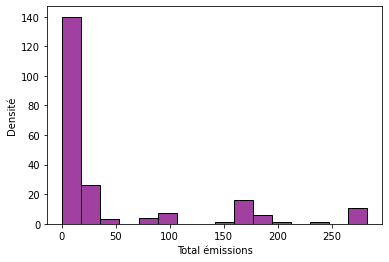

In [117]:
sns.histplot(base_esane_secten["eges"], bins=16, color="purple")
#plt.bar_label(xlabel='Total émissions')
plt.xlabel('Total émissions')
plt.ylabel('Densité')

### Distribution des émissions GES par secteur d'émissions

<AxesSubplot:xlabel='secteur', ylabel='eges'>

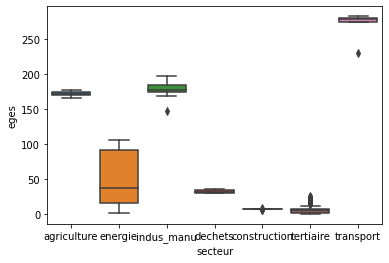

In [118]:
## Boxplot
sns.boxplot(x = "secteur", y = "eges", data=base_esane_secten)

## Evolution des émissions GES par secteur d'émissions

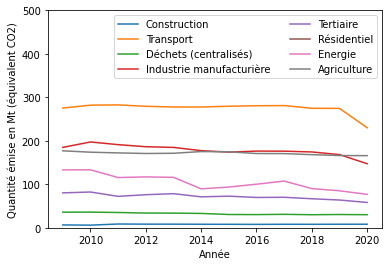

In [119]:
# Evolution
liste_noms = ['construction', 'transport', 'dechets', 'indus_manu','tertiaire', 'residentiel','energie','agriculture']
liste_noms_affiches = ['Construction', 'Transport', 'Déchets (centralisés)', 'Industrie manufacturière','Tertiaire', 'Résidentiel',
'Energie','Agriculture']
var_nom =[]
for nom in liste_noms:
    plt.plot(base_esane_secten["annee"][base_esane_secten.secteur == nom],
    base_esane_secten["total_ges"][base_esane_secten.secteur == nom])
    var_nom.append(nom)


#plt.figure(figsize=(5, 5))
plt.ylim([0,500])
plt.legend(liste_noms_affiches, ncol =2)
plt.xlabel('Année')
plt.ylabel('Quantité émise en Mt (équivalent CO2)')
plt.show()

In [120]:
base_esane_secten["eges"].isna().sum()

0

### Affichage de la base en filtrant par secteur Construction

In [122]:
base_esane_secten[["secteur","annee","SecteurDActivite",
"total_ges","eges","CA_hors_taxe"]][base_esane_secten.secteur == 'construction']

,secteur,annee,SecteurDActivite,total_ges,eges,CA_hors_taxe
5,construction,2009,F,6.592161,6.592161,250548.60000
23,construction,2010,F,6.114995,6.114995,256611.30000
41,construction,2011,F,8.707338,8.707338,272077.50000
59,construction,2012,F,8.376723,8.376723,282147.10000
77,construction,2013,F,8.362793,8.362793,294514.10000
95,construction,2014,F,8.144755,8.144755,288852.70000
113,construction,2015,F,8.040022,8.040022,274126.30000
131,construction,2016,F,7.886242,7.886242,276532.40000
149,construction,2017,F,8.119964,8.119964,295139.20000
167,construction,2018,F,8.043518,8.043518,305431.60000


## D'autres graphiques

<function matplotlib.pyplot.show(close=None, block=None)>

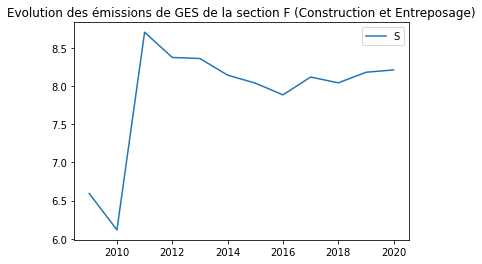

In [123]:
plt.plot(base_esane_secten["annee"][base_esane_secten.secteur == 'construction'],
base_esane_secten["eges"][base_esane_secten.secteur == 'construction'])
plt.legend('Section F: Construction et Entreposage')
plt.title('Evolution des émissions de GES de la section F (Construction et Entreposage)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

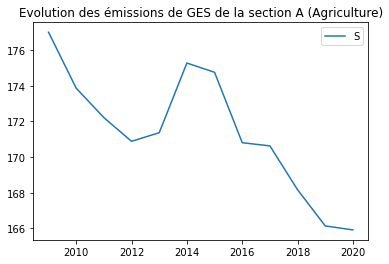

In [124]:
plt.plot(base_esane_secten["annee"][base_esane_secten.SecteurDActivite == 'A '],
base_esane_secten["eges"][base_esane_secten.SecteurDActivite == 'A '])
plt.legend('Section A: Agriculture')
plt.title('Evolution des émissions de GES de la section A (Agriculture)')
plt.show

In [125]:
## Les émissions des secteurs en 2020
base_esane_secten.secteur.value_counts()

tertiaire       132
energie          24
agriculture      12
indus_manu       12
dechets          12
construction     12
transport        12
Name: secteur, dtype: int64

In [126]:
 # variables de description
var = ['annee', 'NbEntrp','FraisPersonnel','CA_exportation', 
       'Salaries_tps_plein', 'CA_hors_taxe', 'EBE',
       'VA_et_autres_prdts_charges', 'ResultatNetComptable',
       'CapaciteAutofinancement','InvestCorporelsBrutsHorsApports', 'total_ges']

<AxesSubplot:>

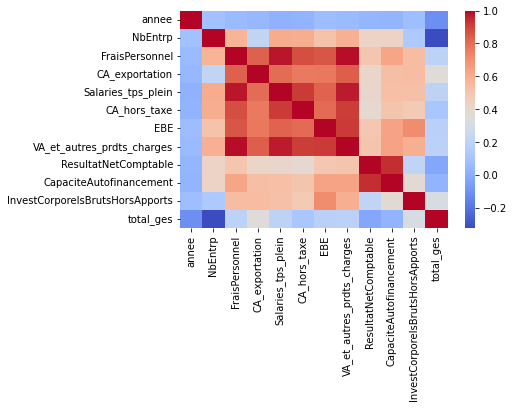

In [127]:
# Matrice de corrélation des variables (couleur)
sns.heatmap(base_esane_secten[var].corr(), cmap = 'coolwarm')

In [128]:
## Matrix correlation
import matplotlib as mpl
features = var
def visualize_correlation_matrix(data, hurdle=0.0):
    R = np.corrcoef(data, rowvar=0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap=mpl.cm.coolwarm, alpha=0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor=False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor=False)
    heatmap.axes.set_xticklabels(features, minor=False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(features, minor=False)
    plt.tick_params(axis='both', which='both', bottom='off', 
                    top='off', left='off', right='off')
    plt.colorbar()
    plt.show()

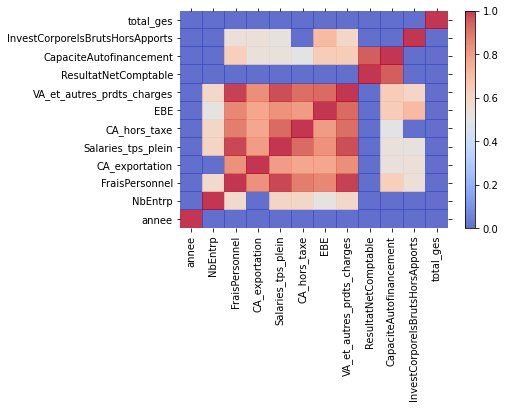

In [129]:
visualize_correlation_matrix(base_esane_secten[var], hurdle=0.5)

In [130]:
# Corrélation de spearman
corr = base_esane_secten.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'))
corr

,annee,NbEntrp,FraisPersonnel,Salaries_tps_plein,CA_exportation,CA_hors_taxe,EBE,VA_et_autres_prdts_charges,ResultatNetComptable,CapaciteAutofinancement,ResultatCourantAvantImpots,InvestCorporelsBrutsHorsApports,CO2,CO2e,CH4,N2O,HFC,PFC,SF6,NF3,Gaz_fluores,total_ges,eges
annee,1.0,0.099,0.12,0.095,0.19,0.19,0.071,0.11,0.12,0.074,0.078,0.13,-0.33,-0.37,-0.25,-0.26,-0.29,0.26,-0.36,-0.0047,-0.32,-0.38,-0.062
NbEntrp,0.099,1.0,0.63,0.67,0.22,0.56,0.54,0.62,0.52,0.49,0.55,0.29,-0.42,-0.16,-0.68,-0.41,0.5,0.48,-0.063,0.079,0.44,-0.41,-0.25
FraisPersonnel,0.12,0.63,1.0,0.97,0.8,0.95,0.81,0.99,0.69,0.74,0.78,0.7,-0.095,0.13,-0.35,-0.081,0.15,0.31,-0.00018,0.37,0.14,-0.091,0.33
Salaries_tps_plein,0.095,0.67,0.97,1.0,0.73,0.91,0.75,0.94,0.59,0.61,0.67,0.68,-0.1,0.12,-0.36,-0.061,0.15,0.29,-0.055,0.37,0.13,-0.096,0.28
CA_exportation,0.19,0.22,0.8,0.73,1.0,0.85,0.62,0.77,0.52,0.6,0.61,0.71,0.077,0.26,-0.055,0.041,-0.099,0.17,0.079,0.39,-0.079,0.076,0.47
CA_hors_taxe,0.19,0.56,0.95,0.91,0.85,1.0,0.81,0.95,0.67,0.7,0.76,0.75,-0.11,0.1,-0.32,-0.066,0.033,0.22,-0.015,0.35,0.014,-0.11,0.37
EBE,0.071,0.54,0.81,0.75,0.62,0.81,1.0,0.88,0.74,0.82,0.78,0.77,0.0069,0.24,-0.23,-0.11,0.21,0.34,0.14,0.36,0.22,0.012,0.32
VA_et_autres_prdts_charges,0.11,0.62,0.99,0.94,0.77,0.95,0.88,1.0,0.72,0.76,0.79,0.73,-0.097,0.13,-0.34,-0.089,0.16,0.32,-0.0071,0.36,0.15,-0.095,0.34
ResultatNetComptable,0.12,0.52,0.69,0.59,0.52,0.67,0.74,0.72,1.0,0.91,0.95,0.49,-0.098,0.14,-0.32,-0.23,0.24,0.34,0.19,0.26,0.24,-0.094,0.22
CapaciteAutofinancement,0.074,0.49,0.74,0.61,0.6,0.7,0.82,0.76,0.91,1.0,0.94,0.6,-0.061,0.17,-0.28,-0.25,0.31,0.42,0.23,0.32,0.33,-0.054,0.24


### Nettoyage avant enregistrement
AVant la base finale filière, on ajoute `_secteur` devant chaque variable pour préciser qu'il s'agit d'une variable d'info niveau filière. 

In [131]:
col = []

for c in base_esane_secten.columns:
    nom = c + '_secteur'
    col.append(nom)

In [132]:
# vérification
len(col) == len(base_esane_secten.columns)

True

In [133]:
base_esane_secten.columns = col

In [134]:
# Suppression des espaces dans les modalités de la variable SecteurDActivite
for i in range(base_esane_secten.shape[0]):
    base_esane_secten.loc[i,'SecteurDActivite_secteur'] = base_esane_secten.loc[i,'SecteurDActivite_secteur'].strip()

In [135]:
len(base_esane_secten.loc[1, 'SecteurDActivite_secteur'])

1

In [ ]:
base_esane_secten.drop('total_ges_secteur', axis= 1, inplace= True)

In [346]:
# Enregistrement en csv de la Secten
base_esane_secten.to_csv('../esane/base_secteur_vf.csv', index=False)

*===============================================================================================*